## INTRODUCTION
A machine learning project begins by understanding the data. Before applying machine learning algorithms to our datasets, we have to understand, built and analyse the data as to get the final result.

Following are the main steps:

1) Understand and define the problem

2) Pre-process the data

3) Explore and Analyse the data

4) Using the algorithms

5) Predict the result

To desmontrate for this, we are going to use the Iris dataset, one of the most famous datasets available for beginners to learn about Machine learning.

### What is problems?
This dataset consists of the features, include Sepal width, Sepal length, Petal width and Petal length of three species of  Iris flower — Versicolor, Setosa and Virginica. We will be predicting the classes of the flowers by training the model based on these features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input/"))

['iris']


### Understanding the data

First, try to understand the basic desciption of the data.

In [2]:
dt_iris = pd.read_csv("../input/iris/Iris.csv")
dt_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dt_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dt_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Analysing the data visually

At the outset, let using a boxplot , to get a visual view of the data. Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation.

<Figure size 432x288 with 0 Axes>

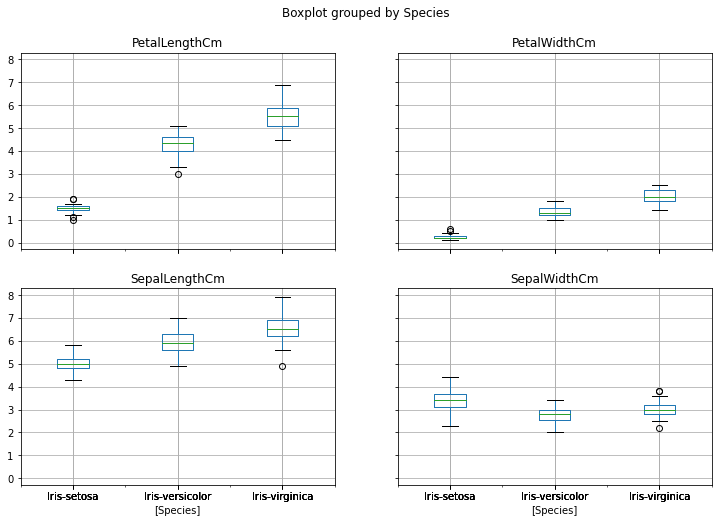

In [5]:
plt.figure()
dt_iris.drop('Id',axis = 1).boxplot(by="Species", figsize=(12,8))
plt.show()

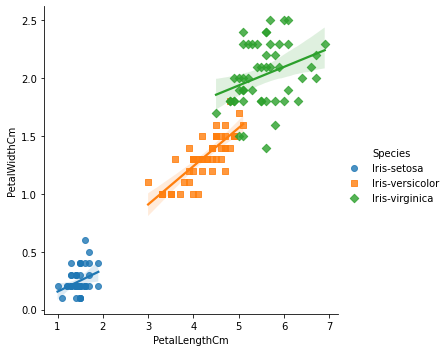

In [6]:
# Using lmplot: 
g = sns.lmplot(
    data=dt_iris,
    x="PetalLengthCm", y="PetalWidthCm", hue="Species", markers = ['o','s','D'],
    height = 5)

### Splitting the data for training and testing

Now we have understood what the dataset is about, we can start training a model based on the algorithms. We will be implementing some of the commonly used algorithms in machine learning. We use an available library called ‘train_test_split’ which divides this data set into a ratio of 70:30.

In [7]:
# Modeling with scikit learn
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [8]:
# We drop 'Id' column in dataset because it is not important
X = dt_iris.drop(['Id','Species'], axis = 1)
y = dt_iris['Species']
# Splitting the dataset into the Training set and Test set (ratio 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### Training the model

Using some of the commonly used algorithms for training our model, we will check how accurate every algorithm is. The algorithms are used for training:

1) K – Nearest Neighbour (KNN)

2) Logistic Regression

We can start with the first algorithm K – Nearest Neighbour. 

[0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


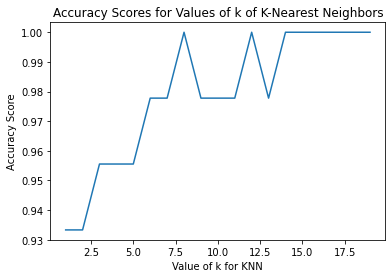

In [9]:
# Experimenting with different n values
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of K-Nearest Neighbors')
plt.show()


Next, we continue with Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predlog = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, y_predlog)
print('Accuracy is', score)

Accuracy is 0.9777777777777777
